<a href="https://colab.research.google.com/github/melvin-mango/Decision-Trees/blob/main/Decision_Trees_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal classification using Decision Trees
This notebook mainly focuses on classifying whether animals are mammals or non-mammals.

- We will start by importing pandas library
- For this exercise we will use the dataset 'vertebrate.csv'
- For the assignment we will use animals.csv



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('vertebrate.csv',header = 'infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


- In the class column, we already have mammals classified.
- We will now replace the other categories with non-mammals

In [ ]:
data['Class']=data['Class'].replace(['reptiles','fishes','amphibians','birds'],'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [ ]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

- After a cross-tabulation, we can see that animals that give birth and are warm blooded are more likely to become mammals.
- We will use these two columns later to come up with a decision tree classifier model.

# Building the classifier model
- We will import 'tree' from sckit-learn.
- Then we will set **y** to be the class column
- And **X** will be the other columns apart from the 'Name' and 'Class' column

In [ ]:
from sklearn import tree

In [ ]:
y=data['Class']
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [ ]:
X=data.drop(['Name','Class'],axis=1)
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


- Next, we call our decision tree classifier function
- Then we will fit our variables X and y to create the model

In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf=clf.fit(X,y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Creation of Decision tree diagram
- We will import pydotplus
- Then we will import Image from Ipython.display

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data= tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'],filled=True, out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mammals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mammals", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

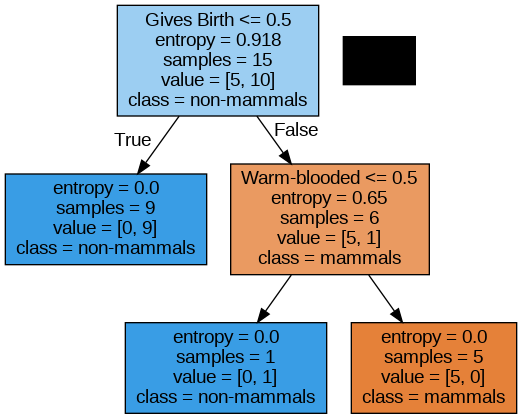

In [ ]:
graph

Image(graph.create_png())

#Testing our Model
- For our model, we will generate a sample data to test our model.

In [ ]:
testData=[['gila monister', 0,0,0,0,1,1, 'non-mammals'],['platypus', 1,0,0,0,1,1, 'mammals'],
 ['owl', 1,0,0,1,1,0, 'non-mammals'], ['dolphin', 1,1,1,0,0,0, 'mammals']]

In [ ]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [ ]:
testData=pd.DataFrame(testData,columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [ ]:
testY=testData['Class']
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [ ]:
testX=testData.drop(['Name','Class'],axis=1)
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [ ]:
predY=clf.predict(testX)
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [ ]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

- From the table below, we can see that our model managed to get three predictions correctly and only one attempt is false.

In [ ]:
predictions=pd.concat([testData['Name'],testData['Class'],pd.Series(predY,name='Predicted Class')],axis=1)
predictions

,Name,Class,Predicted Class
0,gila monister,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


- Now we can go ahead and obtain the accuracy score.
- The model is 75% accurate which is decent.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testY,predY)

0.75

In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


# Decision Tree Assignment
- For this assignment we will use the dataset animal.csv

In [ ]:
data1 = pd.read_csv('animals.csv',header = 'infer')
data1

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [ ]:
data1['Class']=data1['Class'].replace([1],'mammals')
data1['Class']=data1['Class'].replace([2,3,4,5,6,7],'non-mammals')
data1

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammals
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,non-mammals
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,non-mammals
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,non-mammals
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,non-mammals
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,non-mammals


- Cross-tabulation

In [ ]:
pd.crosstab([data1[' Hair'],data1[' Milk']],data1['Class'])

Class        mammals  non-mammals
 Hair  Milk                      
0     0            0           50
      1            2            0
1     0            0            3
      1           35            0

#Building the classifier model

In [ ]:
from sklearn import tree

In [ ]:
y=data1['Class']
y

0         mammals
1         mammals
2     non-mammals
3         mammals
4         mammals
         ...     
85    non-mammals
86    non-mammals
87    non-mammals
88    non-mammals
89    non-mammals
Name: Class, Length: 90, dtype: object

In [ ]:
X=data1.drop(['Sr','Class'],axis=1)
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [ ]:
clf1=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf=clf1.fit(X,y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#Creation of Decision tree diagram

In [ ]:
dot_data= tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'],filled=True, out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Milk <= 0.5\\nentropy = 0.977\\nsamples = 90\\nvalue = [37, 53]\\nclass = non-mammals", fillcolor="#c3e1f7"] ;\n1 [label="entropy = 0.0\\nsamples = 53\\nvalue = [0, 53]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

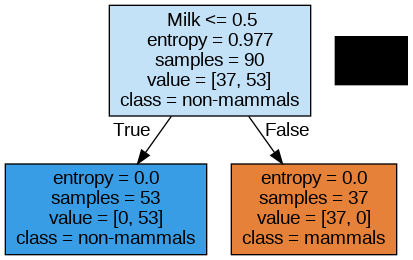

In [ ]:
graph

Image(graph.create_png())

#Testing the model

In [ ]:
testData=[ [100,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,'mammals'], [101,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,'non-mammals'], [102,1,0,0,1,1,1,1,1,1,1,0,0,4,1,0,1,'mammals'], [103,0,1,1,0,1,0,1,1,1,1,0,0,4,1,1,0,'non-mammals'],[104,1,0,0,0,0,0,1,1,1,1,0,0,2,1,1,1,'mammals'], [101,0,1,1,1,1,0,0,0,1,1,0,0,4,1,1,0,'non-mammals']]

In [ ]:
data1.columns

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')

In [ ]:
testData=pd.DataFrame(testData,columns=data1.columns)
testData

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,100,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,mammals
1,101,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,non-mammals
2,102,1,0,0,1,1,1,1,1,1,1,0,0,4,1,0,1,mammals
3,103,0,1,1,0,1,0,1,1,1,1,0,0,4,1,1,0,non-mammals
4,104,1,0,0,0,0,0,1,1,1,1,0,0,2,1,1,1,mammals
5,101,0,1,1,1,1,0,0,0,1,1,0,0,4,1,1,0,non-mammals


In [ ]:
testY=testData['Class']
testY

0        mammals
1    non-mammals
2        mammals
3    non-mammals
4        mammals
5    non-mammals
Name: Class, dtype: object

In [ ]:
testX=testData.drop(['Sr','Class'],axis=1)
testX

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1
1,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
2,1,0,0,1,1,1,1,1,1,1,0,0,4,1,0,1
3,0,1,1,0,1,0,1,1,1,1,0,0,4,1,1,0
4,1,0,0,0,0,0,1,1,1,1,0,0,2,1,1,1
5,0,1,1,1,1,0,0,0,1,1,0,0,4,1,1,0


In [ ]:
predY=clf.predict(testX)
predY

array(['mammals', 'non-mammals', 'mammals', 'non-mammals', 'non-mammals',
       'mammals'], dtype=object)

In [ ]:
testY

0        mammals
1    non-mammals
2        mammals
3    non-mammals
4        mammals
5    non-mammals
Name: Class, dtype: object

In [ ]:
predictions=pd.concat([testData['Sr'],testData['Class'],pd.Series(predY,name='Predicted Class')],axis=1)
predictions

,Sr,Class,Predicted Class
0,100,mammals,mammals
1,101,non-mammals,non-mammals
2,102,mammals,mammals
3,103,non-mammals,non-mammals
4,104,mammals,non-mammals
5,101,non-mammals,mammals


In [ ]:
accuracy_score(testY,predY)

0.6666666666666666

In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.67
